# Nanoindentation

## pyiron

In [1]:
try:
    import os
    os.chdir('/home/menonsqr/repos/FeC')
except:
    pass

from workflows.pyiron.build import bulk, repeat
from workflows.pyiron.indentation import indentation_test, plot_force_depth, plot_temperature, read_final_structure, plot_centrosymmetry
from pyiron_workflow import Workflow
import matplotlib.pyplot as plt

In [2]:
pair_style = "eam/alloy"
pair_coeff = "* * workflows/potentials/Fe_Ack.eam Fe"

In [ ]:
wf = Workflow('indentation1')
wf.structure = bulk('Fe', cubic=True, a=2.87)
wf.repeated_structure = repeat(wf.structure, repetitions=(10, 10, 10))
wf.indentation = indentation_test(wf.repeated_structure, 
                                   pair_style, 
                                   pair_coeff,
                                   indenter_radius=20,
                                   indenter_radius_factor=0.65,
                                   indentation_velocity=2.5,
                                   cores=1,
                                   initial_temperature=10.0,
                                   annealing_temperature=400,
                                   n_equilibration_steps=1000,
                                   dump_interval=500,
                                   print_interval=500)
wf.final_structure = read_final_structure(wf.indentation)
wf.force_plot = plot_force_depth(wf.indentation)
wf.temp_plot = plot_temperature(wf.indentation)
wf.centro_plot = plot_centrosymmetry(wf.final_structure, n_neighbors=8)

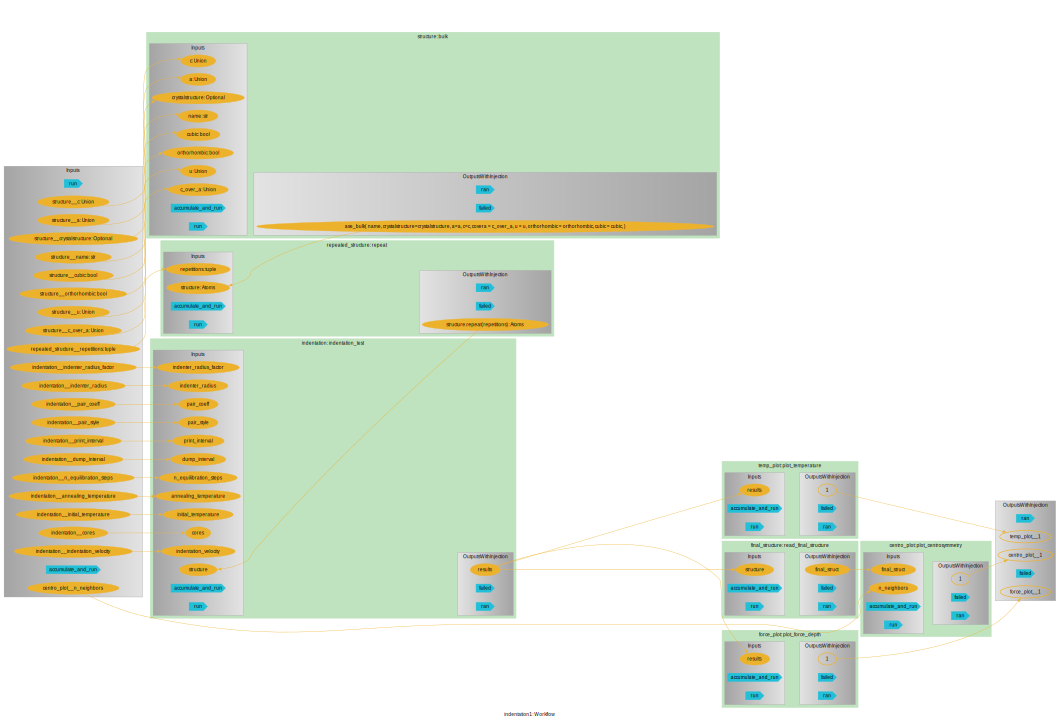

In [4]:
wf.draw(size=(15, 10))

In [ ]:
wf.run()

--------------------------------------------------------------------------

  Local host:   vis001
  Local device: hfi1_0
--------------------------------------------------------------------------


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/home/menonsqr/miniforge3/envs/fec/lib/python3.12/site-packages/executorlib/backend/interactive_serial.py", line 74, in <module>
    main(argument_lst=sys.argv)
  File "/home/menonsqr/miniforge3/envs/fec/lib/python3.12/site-packages/executorlib/backend/interactive_serial.py", line 55, in main
    output = call_funct(input_dict=input_dict, funct=None, memory=memory)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/menonsqr/miniforge3/envs/fec/lib/python3.12/site-packages/executorlib/standalone/interactive/backend.py", line 33, in call_funct
    return funct(input_dict["fn"], *input_dict["args"], **input_dict["kwargs"])
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/menonsqr/miniforge3/envs/fec/lib/python3.12/site-packages/executorlib/standalone/interactive/backend.py", line 22, in funct
    return args[0].__call__(*args[1:], **kwargs)
           ^^^^^^^^^^^^^^

In [12]:
wf.final_structure.outputs.final_struct.value


Atoms(symbols='H54', pbc=True, cell=[8.634683547441524, 8.612211204562836, 72.61928120082996], c_Ene=..., c_Str[1]=..., c_Str[2]=..., c_Str[3]=..., c_Str[4]=..., c_Str[5]=..., c_Str[6]=..., c_f[1]=..., c_f[2]=..., c_f[3]=..., momenta=...)

In [13]:
from pyscal3 import System

In [14]:
sys = System(wf.final_structure.outputs.final_struct.value, format='ase')

In [16]:
sys.calculate.centrosymmetry(8)

array([1.81982117e+01, 1.14943621e+01, 2.64495491e-02, 4.76570078e-02,
       4.28051855e-02, 5.85303384e+00, 1.80685349e+01, 1.16881752e+01,
       4.80809321e-02, 8.71399561e-03, 3.48985296e-02, 5.64777470e+00,
       1.77207015e+01, 1.20464103e+01, 9.52367633e-03, 2.82582753e-02,
       1.27824638e-02, 1.17064810e+01, 1.77702575e+01, 1.73361498e+01,
       5.15412244e-02, 3.10446599e-02, 5.03785562e-02, 2.87693227e-02,
       1.73027456e+01, 1.14770282e+01, 2.17353315e-02, 7.19050360e-03,
       1.13784762e-02, 6.04190950e+00, 1.81170981e+01, 1.67090110e+01,
       1.69415310e-02, 3.38922893e-02, 2.05515066e-02, 5.84590384e+00,
       2.42498039e+01, 1.14560808e+01, 1.29532973e-01, 3.30749110e-02,
       2.75443297e-02, 1.14238008e+01, 2.34309701e+01, 5.59210476e+00,
       7.30210238e-02, 1.57752748e-02, 1.73953282e-02, 1.18385581e+01,
       2.95892159e+01, 5.91763094e+00, 2.45108485e-02, 4.39484423e-02,
       2.34133025e-02, 1.19906657e+01])

In [20]:
from pyscal3.operations.visualize import plot_by_property

In [24]:
plot_by_property(sys, sys.atoms.centrosymmetry, )

Install ipyvolume for visualisation
